## Distinguishing Sentiments - AALVAREZ

In [4]:
#Created on Sat Aug 8 22:14:23 2018
#@author: anthonyalvarez
#Test Files: Distinguishing_sentiments_00-03.ipynb

---
### Referenced Material
 * https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values
 * https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values
 * https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
 * https://pandas.pydata.org/pandas-docs/stable/indexing.html    
 * https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/
 * https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
 * https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
 * https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
 * https://stackoverflow.com/questions/45247486/how-to-do-a-scatter-plot-with-different-edgecolor-in-matplotlib
 * https://stackoverflow.com/questions/311627/how-to-print-date-in-a-regular-format-in-python
 * UCI Lessons 03-07
 * the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.
 * setup a target list to search for
 * @BBCWorld = https://twitter.com/BBCWorld
 * @CBSNews = https://twitter.com/CBSNews
 * @CNN = https://twitter.com/CNN
 * @FoxNews = https://twitter.com/FoxNews
 * @nytimes = https://twitter.com/nytimes

---
### Data Sources ![Data Sources Used](images/excelcsv_med.png "Excel Csv")

* [Twitter Sentiments Output](data/distinguishing_sentiments.csv) Twitter Sentiments Output Data File.
* [OpenWeather](https://openweathermap.org/api) Openweather Data


---
### Data Visualizations

<a href="images/sentiment_analysis_media_tweets_091218.png" target="_blank">Sentiment Analysis of Media Tweets</a>
<img src="images/sentiment_analysis_media_tweets_091218.png" alt="Sentiment Analysis of Media Tweets" height="600" width="400">

<a href="images/overall_media_sentiment_twitter091218.png" target="_blank">Overall media Sentiment based on Twitter</a>
<img src="images/overall_media_sentiment_twitter091218.png" alt="Data Link" height="600" width="400">

---
### Import Warnings

In [10]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

---
### Import Dependencies

In [11]:
%matplotlib notebook

import tweepy
import numpy as np
import pandas as pd
import time

from datetime import datetime, timedelta

import matplotlib.pyplot as plt

from config import(consumer_key
                  ,consumer_secret
                  ,access_token
                  ,access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

---
### File Operations

In [20]:
#get the dates for output files

#https://stackoverflow.com/questions/311627/how-to-print-date-in-a-regular-format-in-python
#datetime.today()
#datetime.now()
#FORMAT='%Y/%m/-%d'
#date=datetime.strptime(time.strftime(FORMAT),FORMAT)
#print(date)

title_date = datetime.now().strftime("%m/%d/%y")
image_date = datetime.now().strftime("%m%d%y")
print(title_date)


09/12/18


In [25]:
#file operations
outputfile = "data/distinguishing_sentiments.csv"


### Functional Logic

In [14]:
#create target terms to search for:
#target_terms = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]
#change the list to a tuple otherwise we get a result like this:
#@
#n
#y
#t
#i
#m
#e
#s
target_terms = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")
#@BBCWorld
#@CBSNews
#@CNN
#@FoxNews
#@nytimes

In [15]:
#pages to use
tpage = 5

#sentiments lists
sentiments = []

compound_list = []
positive_list = []
negative_list = []
neutral_list = []


counter = 0

for target in target_terms:
    #print(target)

    
    for x in range(tpage):
        
        public_tweets = api.user_timeline(target, page=tpage)

        for tweet in public_tweets:
            #print(tweet)

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
        
            timestamped = tweet["created_at"]
            #tweet_id = tweet["id_str"]
            #tweet_id = tweet["id_str"]
            twit = tweet["user"]["screen_name"]
            tweet_text = tweet["text"]
            #print(twit)
        
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            #testing
            #if counter==0:
            #    print(tweet)
            
 
            # Store the Average Sentiments
            sentiments.append({
            "Twitter Handle":target,
            "User": twit,
            "Time Stamp":timestamped,

            "Compound": np.mean(compound_list),
            "Positive": np.mean(positive_list),
            "Neutral": np.mean(negative_list),
            "Negative": np.mean(neutral_list),
                
            "Tweet Text":tweet_text,
            "Tweets Ago": counter
            })


            # Increase counter by 1
            counter += 1


In [17]:
print(sentiments)

[{'Twitter Handle': '@BBCWorld', 'User': 'BBCWorld', 'Time Stamp': 'Tue Sep 11 15:11:47 +0000 2018', 'Compound': 0.2732, 'Positive': 0.093, 'Neutral': 0.051, 'Negative': 0.856, 'Tweet Text': 'RT @VictoriaLIVE: She didn’t win the Miss America pageant, but stole the show with this 8-second statement:\n\n“From the state with 84% of th…', 'Tweets Ago': 0}, {'Twitter Handle': '@BBCWorld', 'User': 'BBCWorld', 'Time Stamp': 'Tue Sep 11 15:01:11 +0000 2018', 'Compound': 0.1366, 'Positive': 0.0465, 'Neutral': 0.0255, 'Negative': 0.9279999999999999, 'Tweet Text': 'RT @bbctms: Rishabh Pant is the youngest man to score a Test century for India since Ajay Ratra did it back in May 2002. \n\nLive: \n📻📱💻🎥 http…', 'Tweets Ago': 1}, {'Twitter Handle': '@BBCWorld', 'User': 'BBCWorld', 'Time Stamp': 'Tue Sep 11 14:59:02 +0000 2018', 'Compound': 0.09106666666666667, 'Positive': 0.031, 'Neutral': 0.016999999999999998, 'Negative': 0.952, 'Tweet Text': '"This field is now a monument to American defiance... Am

In [14]:
#view some important info
#{'created_at': 'Mon Sep 10 20:15:03 +0000 2018'
#, 'id': 1039245893759844353
#, 'id_str': '1039245893759844353'
#, 'text': 'RT @tmagazine: This Dublin block tells the story of the city https://t.co/DprGBqbqlz 
#, 'expanded_url': 'https://twitter.com/tmagazine/status/1039166546730524673/photo/1'
#, 'type': 'photo'
#, 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}
#, 'small': {'w': 680, 'h': 381, 'resize': 'fit'}
#, 'large': {'w': 1000, 'h': 560, 'resize': 'fit'}

In [27]:
# Convert sentiments to DataFrame

sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head(2)

,Compound,Negative,Neutral,Positive,Time Stamp,Tweet Text,Tweets Ago,Twitter Handle,User
0,0.2732,0.856,0.0510,0.0930,Tue Sep 11 15:11:47 +0000 2018,RT @VictoriaLIVE: She didn’t win the Miss Amer...,0,@BBCWorld,BBCWorld
1,0.1366,0.928,0.0255,0.0465,Tue Sep 11 15:01:11 +0000 2018,RT @bbctms: Rishabh Pant is the youngest man t...,1,@BBCWorld,BBCWorld


In [28]:
#get a count and save the dataframe
print(len(sentiments_pd))
print(len(sentiments_pd.columns))
sentiments_pd.to_csv(outputfile)

500
9


In [29]:
#use filtering to retrieve the data
sentiments_pd.head(2)

,Compound,Negative,Neutral,Positive,Time Stamp,Tweet Text,Tweets Ago,Twitter Handle,User
0,0.2732,0.856,0.0510,0.0930,Tue Sep 11 15:11:47 +0000 2018,RT @VictoriaLIVE: She didn’t win the Miss Amer...,0,@BBCWorld,BBCWorld
1,0.1366,0.928,0.0255,0.0465,Tue Sep 11 15:01:11 +0000 2018,RT @bbctms: Rishabh Pant is the youngest man t...,1,@BBCWorld,BBCWorld


In [30]:
#getting the following error
#KeyError: 'the label [nytimes] is not in the [index]'
#so now will set then reset the index

results_df = sentiments_pd.copy()
results_df = results_df.set_index("User")

results_df.head(2)

,Compound,Negative,Neutral,Positive,Time Stamp,Tweet Text,Tweets Ago,Twitter Handle
User,,,,,,,,
BBCWorld,0.2732,0.856,0.0510,0.0930,Tue Sep 11 15:11:47 +0000 2018,RT @VictoriaLIVE: She didn’t win the Miss Amer...,0,@BBCWorld
BBCWorld,0.1366,0.928,0.0255,0.0465,Tue Sep 11 15:01:11 +0000 2018,RT @bbctms: Rishabh Pant is the youngest man t...,1,@BBCWorld


In [31]:
#view distinct handles
#print(results_df.index.unique())
users = results_df.index.unique()
print(f'{len(users)} users \n{users}')

5 users 
Index(['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes'], dtype='object', name='User')


In [32]:
#get the first values
bbc_tweetsago_x = results_df.loc["BBCWorld", "Tweets Ago"].values
cbs_tweetsago_x = results_df.loc["CBSNews", "Tweets Ago"].values
cnn_tweetsago_x = results_df.loc["CNN", "Tweets Ago"].values
fox_tweetsago_x = results_df.loc["FoxNews", "Tweets Ago"].values
nyt_tweetsago_x = results_df.loc["nytimes", "Tweets Ago"].values


In [33]:
#get the second values
bbc_compound_y = results_df.loc["BBCWorld", "Compound"].values
cbs_compound_y = results_df.loc["CBSNews", "Compound"].values
cnn_compound_y = results_df.loc["CNN", "Compound"].values
fox_compound_y = results_df.loc["FoxNews", "Compound"].values
nyt_compound_y = results_df.loc["nytimes", "Compound"].values

In [34]:
#get the avg values from the dataframe
bbc_com_avg = results_df.loc["BBCWorld", "Compound"].mean()
cbs_com_avg = results_df.loc["CBSNews", "Compound"].mean()
cnn_com_avg = results_df.loc["CNN", "Compound"].mean()
fox_com_avg = results_df.loc["FoxNews", "Compound"].mean()
nyt_com_avg = results_df.loc["nytimes", "Compound"].mean()


In [35]:
#create an averages df

#got this error
#ValueError: If using all scalar values, you must pass an index
#https://stackoverflow.com/questions/17839973/construct-pandas-dataframe-from-values-in-variables
#https://eulertech.wordpress.com/2017/11/28/pandas-valueerror-if-using-all-scalar-values-you-must-pass-an-index/
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html
#df.set_index('month')


#starting over.
#create an averages df
dls_bbc_avg = {"user":"BBC World", "Compound": bbc_com_avg}
dls_cbs_avg = {"user":"CBS News", "Compound": cbs_com_avg}
dls_cnn_avg = {"user":"CNN", "Compound": cnn_com_avg}
dls_fox_avg = {"user":"FOX News", "Compound": fox_com_avg}
dls_nyt_avg = {"user":"New York Times", "Compound": nyt_com_avg}

compounds_df = pd.DataFrame([dls_bbc_avg
                            ,dls_cbs_avg
                            ,dls_cnn_avg
                            ,dls_fox_avg
                            ,dls_nyt_avg])

compounds_df.head()


,Compound,user
0,-0.123201,BBC World
1,-0.086437,CBS News
2,-0.067569,CNN
3,-0.056121,FOX News
4,-0.042923,New York Times


In [36]:
#np.arange(bbc_tweetsago_x)
#get the range of values for the x axis
targetx_axis = np.arange(0, len(bbc_compound_y), 1)
print(targetx_axis)

#np.arange(len(Compound_df["BBC Compound"]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [37]:
#assign each one a color
bbc_color = "blue"
cbs_color = "green"
cnn_color = "orange"
fox_color = "red"
nyt_color = "purple"

colors = [bbc_color, cbs_color, cnn_color, fox_color, nyt_color]

markers = ["o", "d", "+", "8", "D"]

In [38]:
#create labels for the graph
#for x in users:
#    print(x)

xticks = [x for x in users]
xticks

['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

---
## Sentiment Analysis of Media Tweets

In [39]:
#scatter plot titles,lables etc
scatsent_title = "Sentiment Analysis of Media Tweets (" + title_date + ")"
scatsent_image_title = "sentiment_analysis_media_tweets_" + image_date + ".png"
scatsent_xlabel= "Tweets Ago"
scatsent_ylabel = "Tweet Polarity"

begin_range = 0
end_range = len(targetx_axis)+1
step_range = 10


<IPython.core.display.Javascript object>


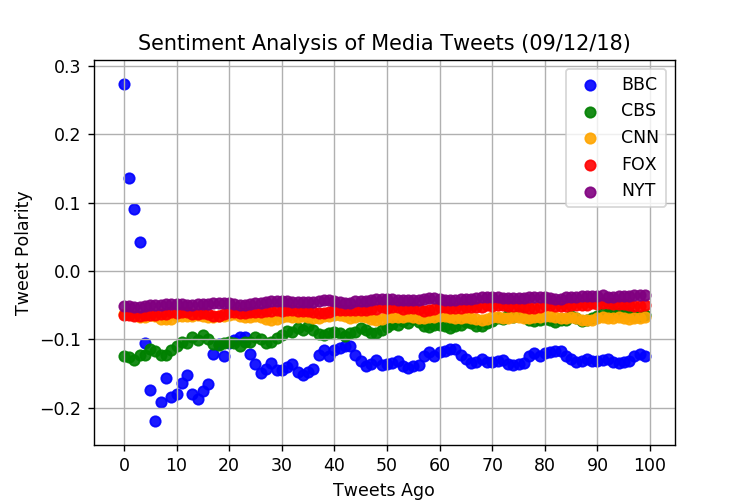

In [40]:
plt.figure(figsize=(6,4))

#bbc
scatter_bbc = plt.scatter(targetx_axis, bbc_compound_y, marker=markers[0] ,alpha=.9 ,c=colors[0], label="BBC")

#cbs
scatter_cbs = plt.scatter(targetx_axis, cbs_compound_y, marker=markers[0] ,alpha=.9 ,c=colors[1], label="CBS")

#cnn
scatter_cnn = plt.scatter(targetx_axis, cnn_compound_y, marker=markers[0] ,alpha=.9 ,c=colors[2], label="CNN")

#fox
scatter_fox = plt.scatter(targetx_axis, fox_compound_y, marker=markers[0] ,alpha=.9 ,c=colors[3], label="FOX")

#nyt
scatter_nyt = plt.scatter(targetx_axis, nyt_compound_y, marker=markers[0] ,alpha=.9 ,c=colors[4], label="NYT")


plt.title(scatsent_title)
plt.xlabel(scatsent_xlabel)
plt.ylabel(scatsent_ylabel)

plt.xticks(np.arange(begin_range, end_range, step=step_range))
plt.grid()
plt.legend(handles=[scatter_bbc, scatter_cbs, scatter_cnn, scatter_fox, scatter_nyt], loc="best")

plt.savefig("images/" + scatsent_image_title)
plt.show()



---
### Overall media Sentiment based on Twitter

In [42]:
#get some axis values and the range
overall_xaxis = compounds_df["user"].values
overall_yaxis = compounds_df["Compound"].values

oaxis = np.arange(len(overall_xaxis))
oaxis


array([0, 1, 2, 3, 4])

In [43]:
#scatter plot titles,lables etc
barsent_title = "Overall media Sentiment based on Twitter (" + title_date + ")"
#barsent_xlabel= "user names"
barsent_image_title = "overall_media_sentiment_twitter" + image_date + ".png"
barsent_ylabel = "Tweet Polarity"

bar_begin_range = 0
bar_end_range = len(overall_xaxis)+1
bar_step_range = 1


barxticks = [x for x in compounds_df["user"]]
barxticks


['BBC World', 'CBS News', 'CNN', 'FOX News', 'New York Times']

<IPython.core.display.Javascript object>


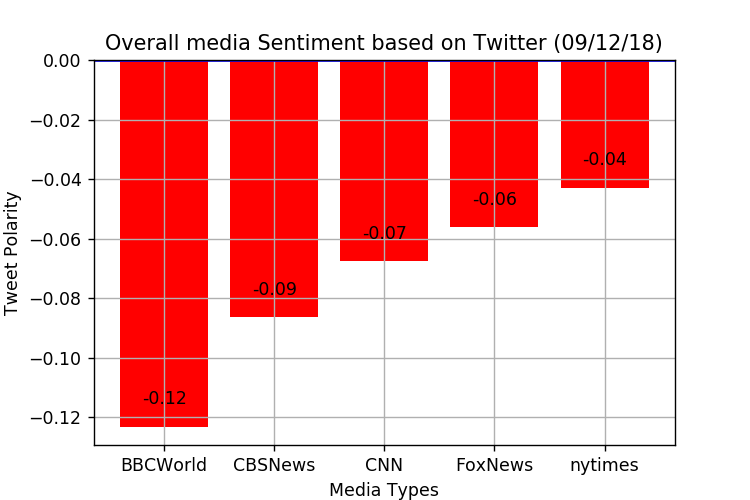

In [44]:
plt.figure(figsize=(6,4))

#add the colors
plt.bar(oaxis, overall_yaxis, color="r")

#add tick values
plt.xticks(oaxis, xticks)

#add a line on zero
plt.axhline(y=0, color = 'blue')

plt.title(barsent_title)

plt.xlabel("Media Types")

plt.ylabel(barsent_ylabel)



i = 0
for row in compounds_df["Compound"]:
    numperc=round(row,2)

    #need to change the y value else all labels are on horizontal zero line
    if numperc < 0:
        yloc = row + 0.0075
        ycolor = 'white'
    else:
        yloc = numperc + 0.01
        ycolor = 'black'
     #increase counts
      
    plt.text(i, yloc, numperc,ha='center', color='black')
    i += 1 



plt.grid()

#save the plot
plt.savefig("images/" + barsent_image_title)

plt.show()

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* Include a written description of three observable trends based on the data.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.